# Case Study - Computing $\pi$ 

In this notebook, we illustrate how scientific computations can be made in Python. We will estimate the value of $\pi$ using the following methods

1. Symbolic integration using Sympy
2. Numerical integration using Trapezoidal Rule
3. Stochastic integration using Monte-Carlo Method

We will be using using Numpy and Matplotlib - it is assumed that you are already familiar with both.

## Introduction
First, import Numpy and Matplotlib.

In [1]:
import  matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(seed=4400)

In the Cartesian coordinates, a circle is defined as $r^2=x^2+y^2$. The area of a circle is given by $\pi r^2$. 

Draw a quarter of a circle with a unit radius ($r=1$)

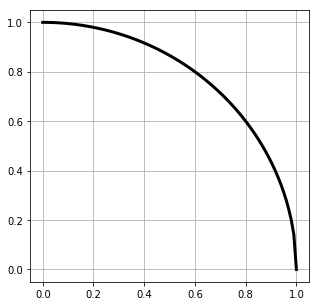

In [2]:
x_circle = np.linspace(0,1,100)
y_circle = np.sqrt(1-x_circle**2)

plt.figure(figsize=(5,5))
plt.plot(x_circle,y_circle,'-k',linewidth=3)
plt.grid(True)

We can see that the area under the curve should be equals to $\pi /4$. Hence, using various  techniques to integrate the line from $x=0$ to $x=1$ will allow us to indirectly compute the value of $\pi$. 

## Symbolic Integration
Back in school, if we were to integrate this we would write $\int_{0}^{1} y\: dx=\int_{0}^{1}\sqrt {r^2-y^2}\;dx$  on paper and solve it accordingly. 

However, for more complex equations (or if we were just lazy), we could use Sympy which is a Python library for symbolic mathematics. Now let's import it.

In [3]:
import sympy 

We first need to map our symbols accordingly using ```sympy.Symbol```. For example for ```x``` and ```y```, the do the following

In [4]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

We can now treat ```x``` and ```y``` as symbols. For example:

In [5]:
x + y - 3*x - y

-2*x

Notice we are now getting answer in symbols. 

There many standard mathematics operations available in Sympy. For example, to find $\frac{dy}{dx}$ and $\int y \;dx$ of the equation $y=-2x^2$

In [6]:
sympy.diff(-2*x**2)

-4*x

In [7]:
sympy.integrate(-2*x**2)

-2*x**3/3

Let's define the equation for our circle with radius of $1$. Note that we now need to use the square root function from Sympy i.e. ```sympy.sqrt``` instead from Numpy.

In [8]:
y = sympy.sqrt(1-x**2)
y

sqrt(-x**2 + 1)

Now let's integrate ```y``` with respect to ```x``` using ```sympy.integrate(y, x)```

In [9]:
y_int = sympy.integrate(y,x)
y_int

x*sqrt(-x**2 + 1)/2 + asin(x)/2

This is an indefinite integration where we don't specify its limits. 

For our quarter circle, we want to integrate from 1 to 0 i.e. $\int_{0}^{1} y\: dx$. So we need to supply lower and upper limit of ```x```  using ```sympy.integrate(y,(x,0,1))```

In [10]:
y_int = sympy.integrate(y,(x,0,1))
y_int

pi/4

Voila! Just exactly what we expected.

This is what we refer to as an analytical method where we can derive or solve something using well-known operations or rules. 

## Numerical Integration (Trapezoidal Rule)

However, in many real-world problems, the mathematical expressions describing the problems we are interested in are often too hard to be solved analytically. This requires us to approximate the solutions by 'chopping-up' (the formal term for this is discretisation) the equations we want to solve.

First let's run this function that we will use later for plotting.

In [11]:
def plot_rec_trapz(number_of_points):
    
    x_line = np.linspace(0,1,number_of_points+1) # n+1 here to add one point at (0,0)
    y_line = np.sqrt(1-x_line**2)
    
    plt.figure(figsize=(11,5))
    plt.suptitle('No. of points = '+ str(number_of_points))
    plt.subplot(1,2,1)
    plt.plot(x_circle, y_circle, 'k')
    for i in range(len(x_line)-1):
        plt.scatter(x_line[i+1],y_line[i+1],c='b')
        plt.plot([x_line[i],x_line[i+1]],[y_line[i],y_line[i]],'-b',linewidth=0.5)
        plt.plot([x_line[i+1],x_line[i+1]],[y_line[i+1],0],'-b',linewidth=0.5)
        plt.plot([x_line[i+1],x_line[i+1]],[y_line[i+1],y_line[i]],'-b',linewidth=0.5)
    plt.grid(True)
    plt.title('Rectangle rule')

    plt.subplot(1,2,2)
    plt.plot(x_circle, y_circle, 'k')
    for i in range(len(x_line)-1):
        plt.scatter(x_line[i+1],y_line[i+1],c='b')
        plt.plot([x_line[i],x_line[i+1]],[y_line[i],y_line[i+1]],'-b',linewidth=0.5)
        plt.plot([x_line[i+1],x_line[i+1]],[y_line[i+1],0],'-b',linewidth=0.5)
    plt.grid(True)
    plt.title('Trapezoidal Rule');

Consider having 5 points on the quarter circle as shown below. The simplest ways to approximate the area under the curve are

1. Assume these points are connected via vertical and horizontal lines to form rectangles i.e. rectangle rule.
2. Assume these points are connected via straight lines i.e. trapezoidal rule.

We visualise these two methods by running ```plot_rec_trapz(number_of_points)``` defined previously. Use 5 for ```number_of_points```

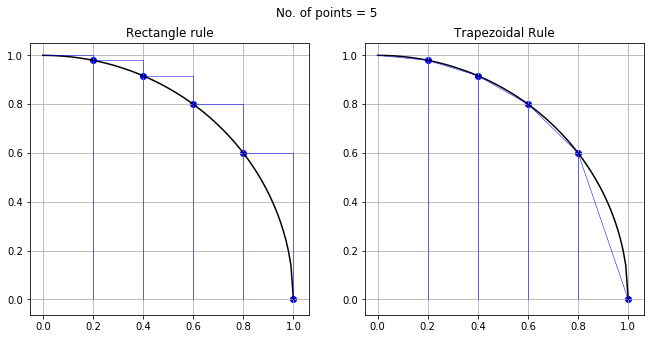

In [12]:
# visualise rectangle and trapezoidal rules
plot_rec_trapz(5)

Let's calculate the area using rectangle and trapezoidal rules. 

1. For rectangle rule, the area is given by $A = \sum_{1}^{n} \Delta x_n \times  y_n = \sum_{1}^{n} \dfrac{1}{n} y_n$
2. For trapezoidal, we can use Numpy function ```np.trapz(your_y_values, your_x_values)```.

Remember that we also needs multiply the area of our quarter circle with 4 to get $\pi$. 

Rectangle rule = 3.07104529239
Trapezoidal rule = 3.12741609726
Real value = 3.141592653589793


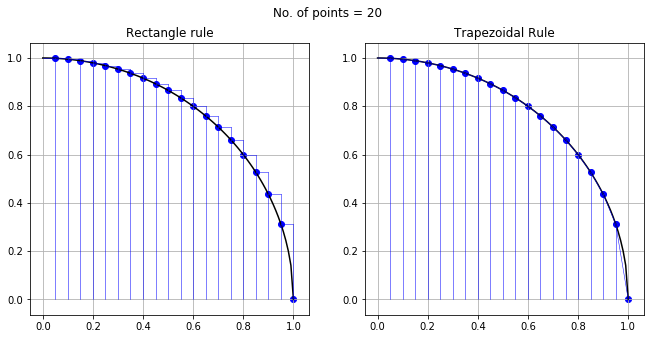

In [13]:
n = 20 # number of points
x_line = np.linspace(0,1,n)
y_line = np.sqrt(1-x_line**2)

# Rectangle rule
pi_rect = sum((1/n)*y_line) * 4

# Trapezoidal  rule
pi_trapz = np.trapz(y_line, x_line) * 4 

# Compare the values
print('Rectangle rule = '+str(pi_rect))
print('Trapezoidal rule = '+str(pi_trapz))
print('Real value = '+str(np.pi))

# plot the areas
plot_rec_trapz(n)

Not surprisingly, trapeziums give a better approximation compared to rectangles. Try to increase number of points and see how the accuracy of $\pi$ estimation is increased.

## Exercise
Write a function to investigate how the solutions for both rules converge to $\pi$ as we vary the number of points $n$

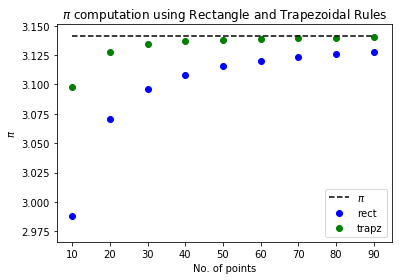

In [14]:
points = np.arange(10,100,10)

for n in points:
    x_line = np.linspace(0,1,n)
    y_line = np.sqrt(1-x_line**2)

    # Rectangle rule
    pi_rect = sum((1/n)*y_line) * 4

    # Trapezoidal  rule
    pi_trapz = np.trapz(y_line, x_line) * 4    
    
    plt.scatter(n,pi_rect, c='b')
    plt.scatter(n,pi_trapz, c='g')

plt.plot(points, np.ones(len(points))*np.pi, '--k')
plt.legend([ '$\pi$','rect', 'trapz'])
plt.xlabel('No. of points')
plt.ylabel('$\pi$')
plt.title('$\pi$ computation using Rectangle and Trapezoidal Rules');

## Stochastic Integration (Monte-Carlo Method)
The previous two methods are what we call deterministic methods whereby the equations are derived from first principles and the same solutions (at some level of accuracies) can be reproduced every single time. 

On the other hand, stochastic methods rely on random processes. Morte-Carlo method for example uses repeated random sampling to solve problems that are difficult or time-consuming to be solved. It has found its way into areas such as optimisation, computational biology, and finance. It also can be used to approximate integration as we will now investigate.

First let's draw 100 random points using ```np.random.rand(number_of_points)``` - we do this for x and y coordinates. This will give us a uniformly distributed samples between 0 and 1.

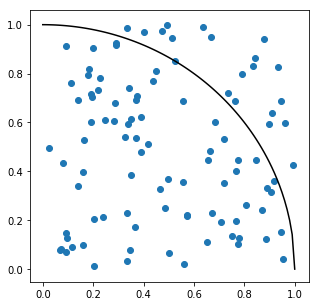

In [15]:
np.random.seed(seed=4400)
n = 100
x_coord = np.random.rand(n)
y_coord = np.random.rand(n)

plt.figure(figsize=(5,5))
plt.plot(x_circle,y_circle, 'k')
plt.scatter(x_coord,y_coord)

In the plot above, we plot the random points together with our quarter circle.

As you might have guessed, we can approximate the area under the curve by simply counting the percentage number of points below the the curve by  checking whether the distance of each point from origin is less than $1$.

In [16]:
# computer the distances from origin for all points
distance = np.sqrt(x_coord**2+y_coord**2)

# check whether less than 1 
distance_less_1  = distance<1 # True if < 1, False if > 1
distance_less_1  = distance_less_1*1 # convert Boolean to one or zero

# compute the area 
pi_mc = sum(distance_less_1)/n * 4
pi_mc

3.2400000000000002

Let's differentiate the points below and above the lines by passing the parameter ```c``` with 1 or 0 in our scatter plot.

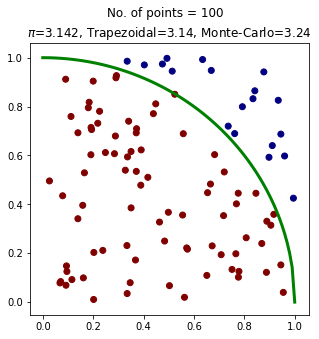

In [17]:
plt.figure(figsize=(5,5))

# draw the circle first 
plt.plot(x_circle,y_circle,'-g',linewidth=3)

# draw the points
# we pass the color c with values one or zero
plt.scatter(x_coord,y_coord, c = distance_less_1, cmap='jet')

plt.title('$\pi$=3.142, Trapezoidal='+str(np.round(pi_trapz,2))+
          ', Monte-Carlo='+str(pi_mc));
plt.suptitle('No. of points = ' + str(n));

Notice how the solution will be different if the random points are distributed differently. This highlights the  stochastic/random nature of Monte-Carlo method. We will see how this affects our approximation of $\pi$ in the next exercise.

## Exercise
The following code shows how the Monte-Carlo solution converges to $\pi$ as we vary the number of points $n$.

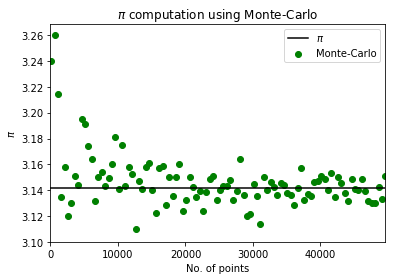

In [18]:
np.random.seed(seed=4400)

#  no. of points from 100 to 50000 at 500 intervals.
points = np.arange(100,50000,500)

for point in points:
    n = int(point)
    x_coord = np.random.rand(n)
    y_coord = np.random.rand(n)
    
    # check distance from origin
    distance = np.sqrt(x_coord**2+y_coord**2)

    # check of the point 
    distance_less_1  = distance<1
    distance_less_1  = distance_less_1*1 # convert boolean to integer
    
    # area under curve
    pi_mc = sum(distance_less_1)/n * 4
    
    plt.scatter(point,pi_mc,c='g') 

plt.plot([0,max(points)],[np.pi,np.pi],'k')
plt.title('$\pi$ computation using Monte-Carlo')
plt.xlabel('No. of points')
plt.ylabel('$\pi$');
plt.xlim(0,max(points))
plt.legend(['$\pi$','Monte-Carlo']);

As you may have expected, adding more random points will increase the accuracy of the prediction (at the expense of higher computational power).

Now try changing the seed number and take note of any differences/similarities compared to the previous results.